



# Part I - Ford GoBike System Data
## by Mahlatse Sophia Mbooi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading data and printing first few columns
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check shape of dataframe
print(df.shape)


(183412, 16)


In [4]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


> start_time and end_time are not date objects

> start_station_id,start_station_name,  have missing values (meaning some bikes do not have a start station)

> start_station_latitude,start_station_longitude. end_station_latitude,end_station_longitude  do not have missing values,- could be because 1. the value is input as a zero  or the start location is not a station 
> for start_station_latitude there are 334 unique values, and start_station_longitude , end_station_latitude and end_station_longitude there are 335 unique values.

> for start_station_id,start_station_name, end_station_id, and end_station_name there are 329 unique values. 

> There are 4646 unique bike_id

> There are 2 user types (customer and subscriber)

> 8265 members don't have a gender and birth year specified



In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> There are 183412 entries in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip')
The features contains numeric, dates, location (longitude, latitude), strings, and binary variables


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the bike users demographics and how that affects the bike lending behavior (frequency and duration)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features  that will help support this investigation are the user_type, 'member_birth_year', 'member_gender', 'duration_sec'

## Wrangling efforts

Convert date features (start_time, end_time) to datetime objects

In [6]:
df['start_time'] = pd.to_datetime(df['start_time']) 
df['end_time'] = pd.to_datetime(df['end_time']) 
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
start_time    183412 non-null datetime64[ns]
end_time      183412 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


In [7]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [8]:
#Convert duration_sec to duration in hours and minutes(more meaningful and relatable than seconds)
df['duration_hours'] = df.duration_sec/3600
df['duration_minutes'] = df.duration_sec/60

#derive age from member_birth_year
df['age'] = df.start_time.dt.year- df.member_birth_year 
df.head(3)

#add more features to the dataset
df['start_day_of_month']= df.start_time.dt.day
df['end_day_of_month']= df.end_time.dt.day
df['days_between']= df.end_day_of_month- df.start_day_of_month
df['weekday_name'] = df.start_time.dt.weekday
df['age'] = df.start_time.dt.year- df.member_birth_year 


In [9]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hours,duration_minutes,age,start_day_of_month,end_day_of_month,days_between,weekday_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,14.495833,869.750000,35.0,28,1,-27,3
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,11.811389,708.683333,NaN,28,1,-27,3


In [10]:
# remove ages over 110
df = df.query('age < 110')

In [11]:
df.shape

(175076, 23)

In [12]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hours,duration_minutes,age,start_day_of_month,end_day_of_month,days_between,weekday_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,14.495833,869.75,35.0,28,1,-27,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,17.181667,1030.90,47.0,28,1,-27,3


## Univariate Exploration


In [13]:
#Function to add chart attributes
def add_chart_attr(title=None, x_axis=None, y_axis=None):
    if title:
        plt.title(title);
    if x_axis:
        plt.xlabel(x_axis)
    if x_axis:
        plt.ylabel(y_axis)
    
    

In [14]:
#check if renters spend more than a day with a bike
df[df.days_between >= 1]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hours,duration_minutes,age,start_day_of_month,end_day_of_month,days_between,weekday_name
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,...,1962.0,Female,Yes,23.109722,1386.583333,57.0,27,28,1,2
7268,66065,2019-02-27 15:00:20.639,2019-02-28 09:21:26.336,349.0,Howard St at Mary St,37.781010,-122.405666,62.0,Victoria Manalo Draves Park,37.777791,...,1994.0,Male,No,18.351389,1101.083333,25.0,27,28,1,2
8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,...,1963.0,Female,No,22.652500,1359.150000,56.0,27,28,1,2
9083,49594,2019-02-27 18:07:59.034,2019-02-28 07:54:33.811,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,1989.0,Male,No,13.776111,826.566667,30.0,27,28,1,2
9820,2062,2019-02-27 23:44:50.567,2019-02-28 00:19:12.895,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,241.0,Ashby BART Station,37.852477,...,1983.0,Male,No,0.572778,34.366667,36.0,27,28,1,2
9821,2077,2019-02-27 23:44:25.900,2019-02-28 00:19:03.047,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,241.0,Ashby BART Station,37.852477,...,1988.0,Male,No,0.576944,34.616667,31.0,27,28,1,2
9822,1240,2019-02-27 23:57:35.180,2019-02-28 00:18:15.938,10.0,Washington St at Kearny St,37.795393,-122.404770,75.0,Market St at Franklin St,37.773793,...,1979.0,Female,No,0.344444,20.666667,40.0,27,28,1,2
9827,2166,2019-02-27 23:37:07.793,2019-02-28 00:13:14.172,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,...,1995.0,Male,No,0.601667,36.100000,24.0,27,28,1,2
9828,812,2019-02-27 23:59:26.945,2019-02-28 00:12:59.246,368.0,Myrtle St at Polk St,37.785434,-122.419622,375.0,Grove St at Masonic Ave,37.774836,...,1992.0,Male,No,0.225556,13.533333,27.0,27,28,1,2
9829,1239,2019-02-27 23:51:43.025,2019-02-28 00:12:22.634,115.0,Jackson Playground,37.765026,-122.398773,33.0,Golden Gate Ave at Hyde St,37.781650,...,1990.0,Male,No,0.344167,20.650000,29.0,27,28,1,2


In [15]:
#check if renters spend more than 24 hours with a bike
df[df.duration_hours ==24]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hours,duration_minutes,age,start_day_of_month,end_day_of_month,days_between,weekday_name


Renters typically spend less than 24 hours with a bike, even though they may have the bike in their possession for 2 consecutive dates

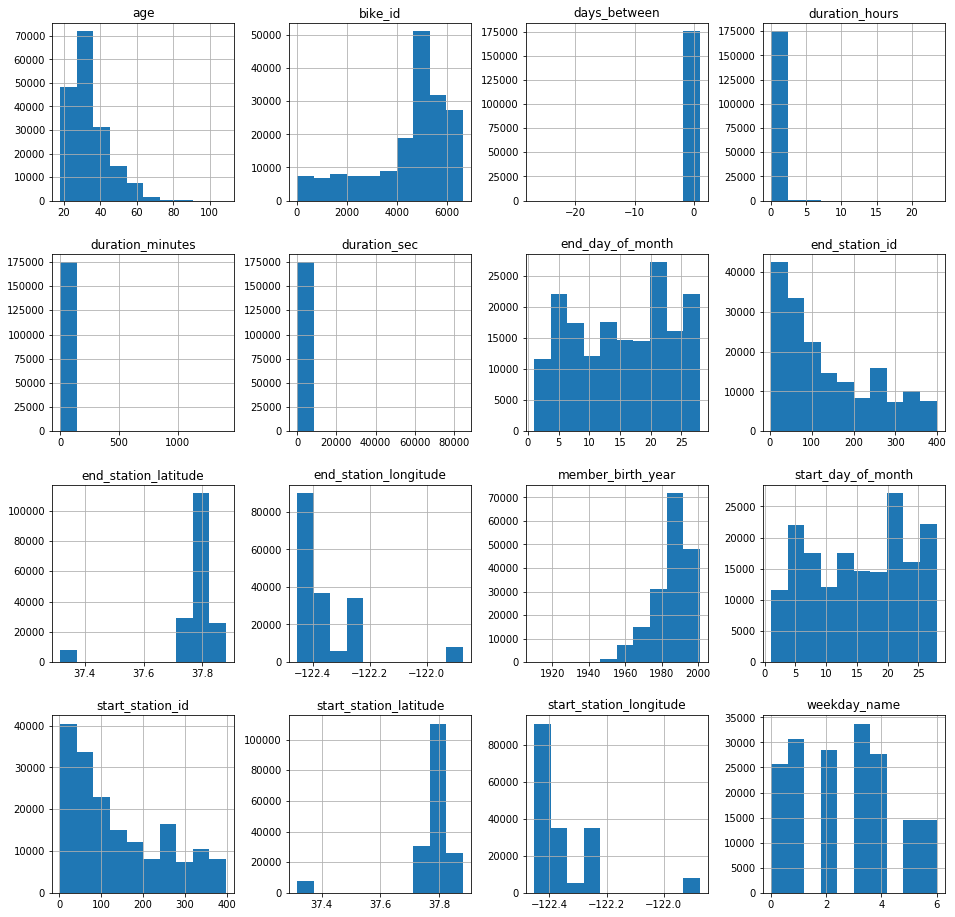

In [16]:
#histogram of all numeric values
df.hist(figsize=(16,16));


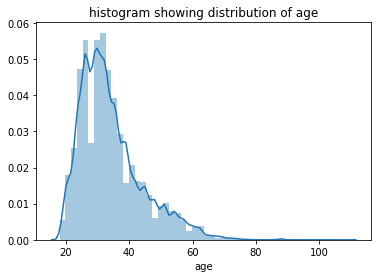

In [17]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.distplot(df[df['age'].notna()]['age'])
add_chart_attr('histogram showing distribution of age');


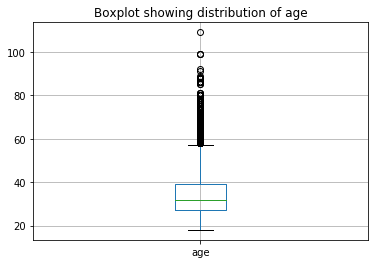

In [18]:
df.boxplot(column='age',)
add_chart_attr('Boxplot showing distribution of age');


In [19]:
df.age.describe()

count    175076.000000
mean         34.159205
std           9.973654
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         109.000000
Name: age, dtype: float64

In [20]:
df['age'].describe()

count    175076.000000
mean         34.159205
std           9.973654
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         109.000000
Name: age, dtype: float64

The distribution of age is right skewed. There are more people in the age group between 20-40 who hire bikes. 
There are suprising ages of over 100 although according to records of oldest people, there is no person over the age of 120. 
[Wikipedia Reference](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people#:~:text=The%20oldest%20known%20living%20person,than%20the%20100%20oldest%20men.)

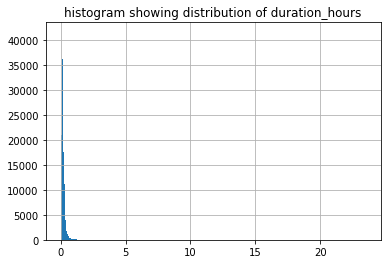

In [21]:
# histogram for duration in minutes
df['duration_hours'].hist(bins=500);
add_chart_attr('histogram showing distribution of duration_hours','');



In [22]:
df.duration_hours.describe()

count    175076.000000
mean          0.195620
std           0.456087
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hours, dtype: float64

The hours are skewed to the right. There are more rentals that spend less than an hour although very few rentals get to spend 23 hours with the bike. 

We will now observe how many rentals by gender

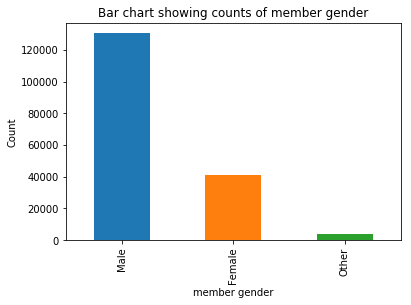

In [23]:
#Bar chart to show counts of member gender across rentals
df['member_gender'].value_counts().plot(kind='bar');
add_chart_attr('Bar chart showing counts of member gender',x_axis='member gender', y_axis='Count');


There are more than twice as much male renters than the female and 'other' genders combined.

What is the most common user type?

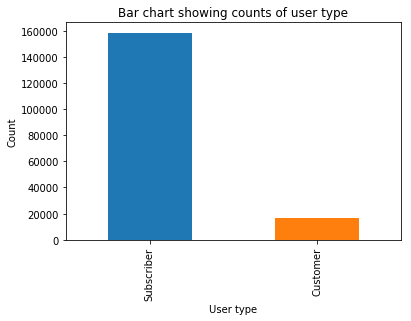

In [24]:
# Bar chart showing counts by user type
df['user_type'].value_counts().plot(kind='bar');
add_chart_attr('Bar chart showing counts of user type',x_axis='User type', y_axis='Count');


Users of type 'subscriber' are more than the 'customer' type. Understandably, if one is subscribed to a service they are perhaps more inclined to use the service.

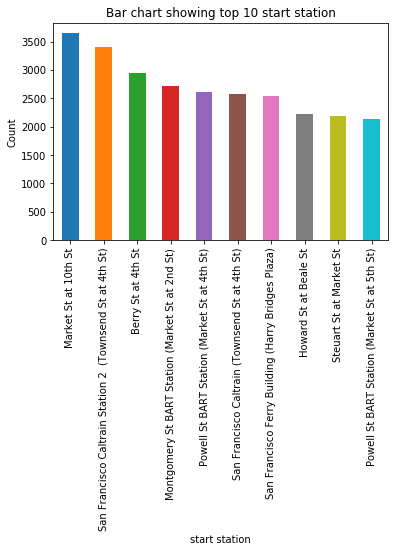

In [25]:
#top 10 start station
(df.start_station_name.value_counts())[0:10].plot(kind='bar');
add_chart_attr('Bar chart showing top 10 start station',x_axis='start station', y_axis='Count');


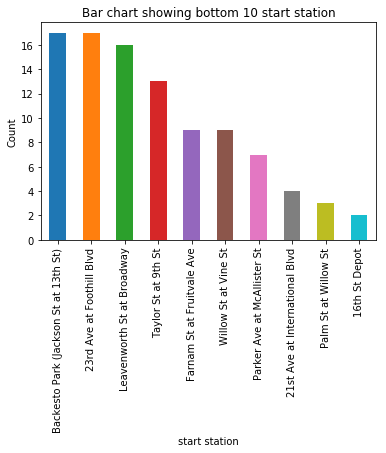

In [26]:
#bottom 10 start station
(df.start_station_name.value_counts())[-10:].plot(kind='bar');
add_chart_attr('Bar chart showing bottom 10 start station',x_axis='start station', y_axis='Count');


The top 10  and bottom 10 start stations are presented on the charts above.  16th st depot is the least used start station and Market st at 10th is the most used start station.

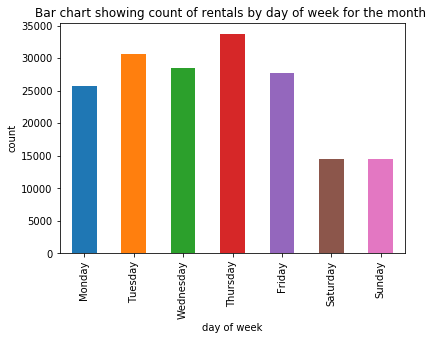

In [27]:
# count of rentals by weekday
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
df.groupby('weekday_name')['duration_minutes'].count().plot(kind='bar')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
add_chart_attr('Bar chart showing count of rentals by day of week for the month ',x_axis='day of week', y_axis='count');


This visualisation shows that Thusday has a higher count of rentals whereas Saturday and Sunday have the lower count of rentals, lets explore average time spent on the bikes by weekday.

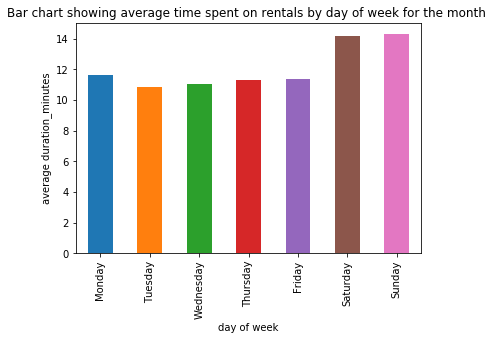

In [28]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
df.groupby('weekday_name')['duration_minutes'].mean().plot(kind='bar')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
add_chart_attr('Bar chart showing average time spent on rentals by day of week for the month ',x_axis='day of week', y_axis='average duration_minutes');


The average time spent on rentals by weekday, shows that Saturday and Sunday are the days where people spend more time with the bikes, with the average of about 16 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of age is right skewed. There are more people in the age group between 20-40 who hire bikes. 
There are suprising ages of over 100 although according to records of oldest people, there is no person over the age of 120. 
[Wikipedia Reference](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people#:~:text=The%20oldest%20known%20living%20person,than%20the%20100%20oldest%20men.)

> The duration_hours are skewed to the right. There are more rentals that spend less than an hour although very few rentals get to spend 23 hours with the bike. 

> There are more users of type 'subscriber' than the 'customer' type.

> Thusday has a higher count of rentals whereas Saturday and Sunday have the lower count of rentals. Howerver, The average time spent on rentals by weekday indicate that Saturday and Sunday are the days where people spend more time with the bikes, with the average time of about 16 minutes.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The unusual distribution found in the data is on the age with a huge skew, and ages of over 120. On the Wikipedia page showing oldest people (disregarding the possibility of physical inability to use a bike for older people), we do not see people aged over 120. So the data will be modified so that no people over age of 110 are in the dataset. 

> ALthough the time spent on the bike is skewed to the right, it will not be changed because they are all less than 23 hours which is likely the bike renting threshold.

## Bivariate Exploration


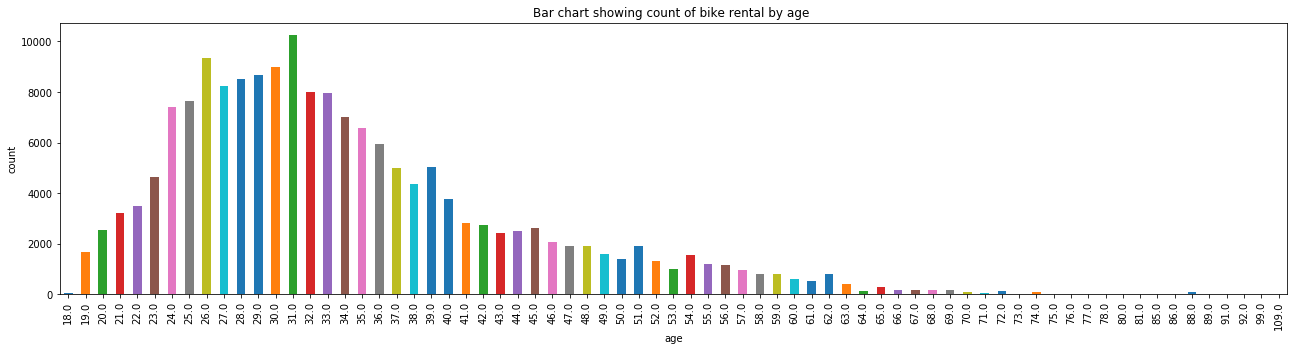

In [29]:
# count of bike rental by age
df.groupby('age')['duration_sec'].count().plot(kind='bar', figsize=(22,5));
add_chart_attr('Bar chart showing count of bike rental by age ',x_axis='age', y_axis='count');


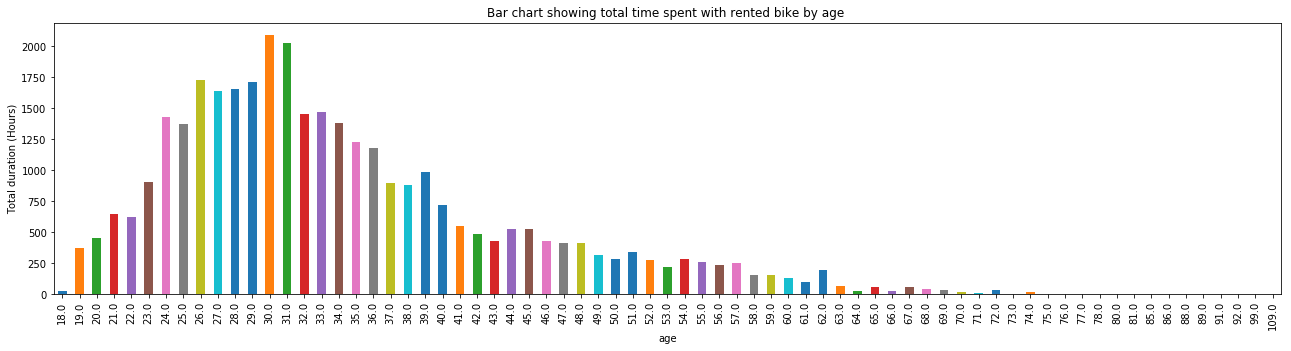

In [30]:
# total time spent with rented bike by age
df.groupby('age')['duration_hours'].sum().plot(kind='bar', figsize=(22,5));
add_chart_attr('Bar chart showing total time spent with rented bike by age ',x_axis='age', y_axis='Total duration (Hours)');


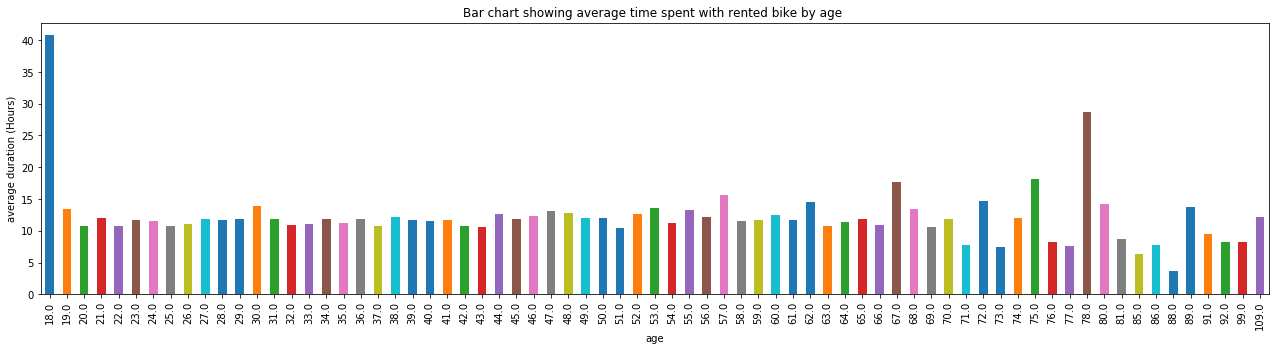

In [31]:
# average time spent with rented bike by age
df.groupby('age')['duration_minutes'].mean().plot(kind='bar',figsize=(22,5));
add_chart_attr('Bar chart showing average time spent with rented bike by age ',x_axis='age', y_axis='average duration (Hours)');


On average, 18 year olds spend the most time with the bike per individual, followed by 78 year olds. However, 30 and 31 year olds'  combined time spent with the bikes is the most at just above 2000 hours. In terms of the age group that frequents the bike rental, the 31 year olds are leading.

Let us now see how member gender uses the bikes:

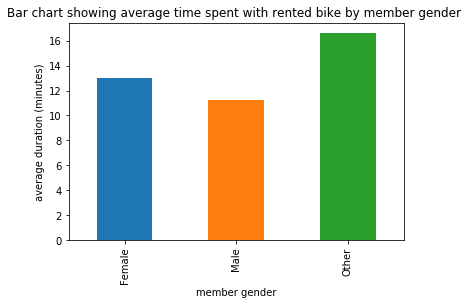

In [32]:
# average duration(minutes) grouped by member gender
df.groupby('member_gender')['duration_minutes'].mean().plot(kind='bar');
add_chart_attr('Bar chart showing average time spent with rented bike by member gender ',x_axis='member gender', y_axis='average duration (minutes)');


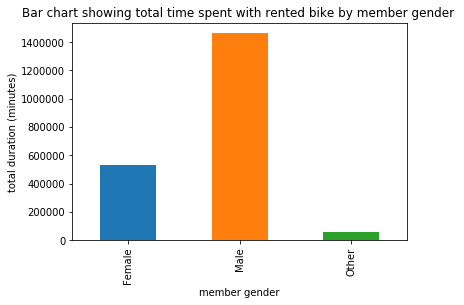

In [33]:
# total duration(minutes) grouped by member gender
df.groupby('member_gender')['duration_minutes'].sum().plot(kind='bar');
add_chart_attr('Bar chart showing total time spent with rented bike by member gender ',x_axis='member gender', y_axis='total duration (minutes)');


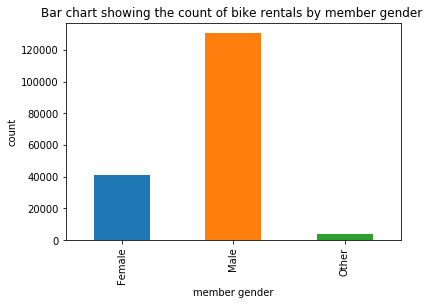

In [34]:
# average duration(minutes) grouped by member gender
df.groupby('member_gender')['duration_minutes'].count().plot(kind='bar');
add_chart_attr('Bar chart showing the count of bike rentals by member gender ',x_axis='member gender', y_axis='count');


On count and total time, the male gender rents bikes the most and uses the bikes the most (time), however, average time spent by a male person on the bikes is the least.
The 'other' gender is the opposite of males, with the least total duration (minutes) and count of renters, but they have the most average time spent on a bike by one person.

Let us explore user type

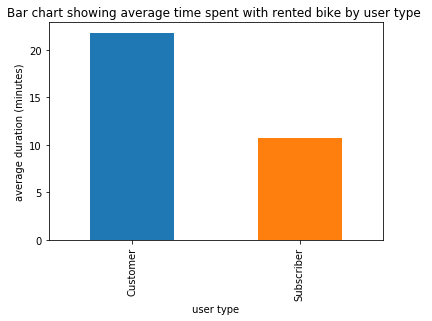

In [35]:
# average duration(minutes) grouped by user type
df.groupby('user_type')['duration_minutes'].mean().plot(kind='bar');
add_chart_attr('Bar chart showing average time spent with rented bike by user type ',x_axis='user type', y_axis='average duration (minutes)');


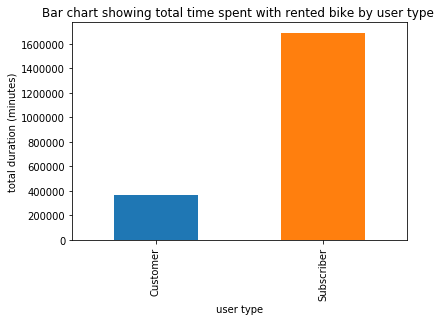

In [36]:
# total duration(minutes) grouped by user type
df.groupby('user_type')['duration_minutes'].sum().plot(kind='bar');
add_chart_attr('Bar chart showing total time spent with rented bike by user type ',x_axis='user type', y_axis='total duration (minutes)');


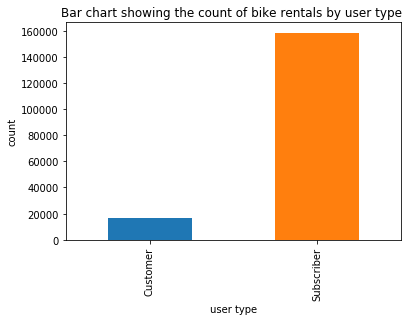

In [37]:
# average duration(minutes) grouped by user type
df.groupby('user_type')['duration_minutes'].count().plot(kind='bar');
add_chart_attr('Bar chart showing the count of bike rentals by user type ',x_axis='user type', y_axis='count');


On count and total time, the subscriber rents bikes the most and uses the bikes the most (time), however, average time spent by a subscriber on the bikes is the least.
The 'customer' is the opposite of subscribers, with the least total duration (minutes) and count of renters, but they have the most average time spent on a bike by one person.

Let us explore user type and member gender

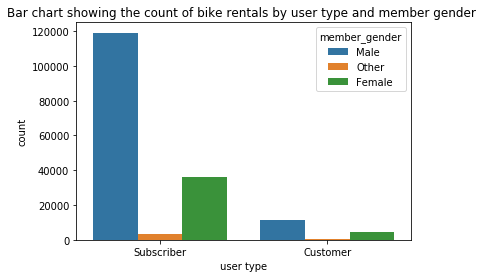

In [38]:
#convert user_type to categorical values and add to dataframe
user_classes = pd.api.types.CategoricalDtype(ordered=True, categories=df['user_type'].value_counts().keys())

# Use pandas.astype() to convert the  column from a plain object type into an ordered categorical type 
df['user_type'] = df['user_type'].astype(user_classes);

# bar graph depicting the relationship between user type and member gender
sns.countplot(data = df, x = 'user_type', hue = 'member_gender');
add_chart_attr('Bar chart showing the count of bike rentals by user type and member gender ',x_axis='user type', y_axis='count');


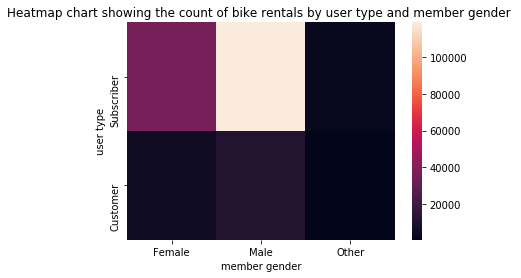

In [39]:
#heatmap depicting the relationship between user type and member gender
ct_counts = df.groupby(['user_type', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sns.heatmap(ct_counts);
add_chart_attr('Heatmap chart showing the count of bike rentals by user type and member gender ',x_axis='member gender', y_axis='user type');


The bar chart and heatmap above indicate the male subsscriber as the one who rents the most, whereas the 'other' customer rents the least. 

Let us explore the user type, member gender and age

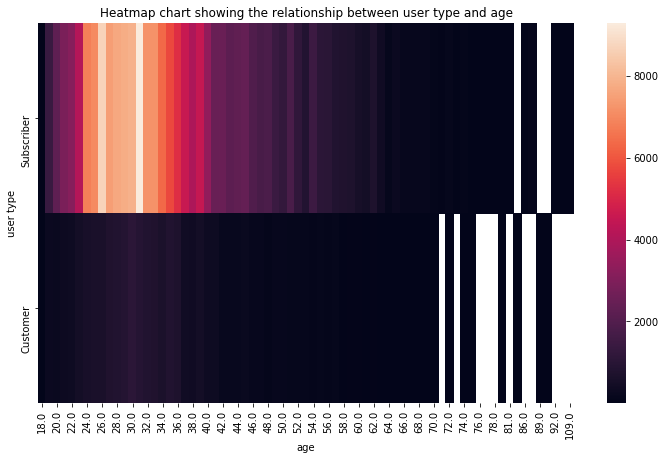

In [40]:
#heatpam depicting the relationship between user type and age
plt.figure(figsize=(12,7))
ct_counts = df.groupby(['user_type', 'age']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'age', values = 'count')
sns.heatmap(ct_counts);
add_chart_attr('Heatmap chart showing the relationship between user type and age',x_axis='age', y_axis='user type');



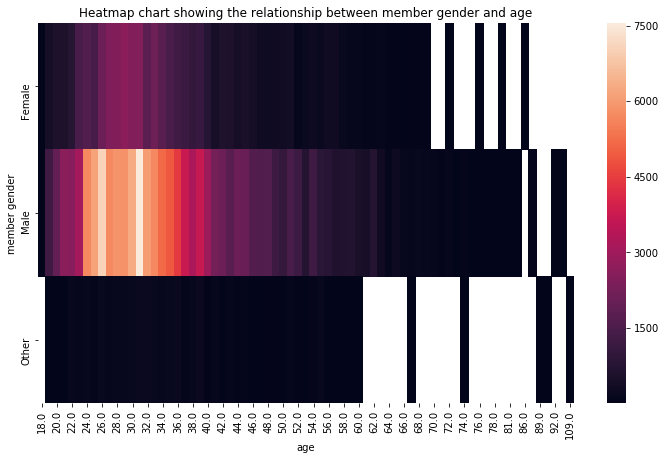

In [41]:
plt.figure(figsize=(12,7))
ct_counts = df.groupby(['member_gender', 'age']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'age', values = 'count')
sns.heatmap(ct_counts);
add_chart_attr('Heatmap chart showing the relationship between member gender and age',x_axis='age', y_axis='member gender');


The male gender has a wider age range of bike renters whereas the femaile gender has a narrower range of renters. The number of user type renting bikes is larger on the younger subscribers.

Exploring member gender, user type and weekday next:

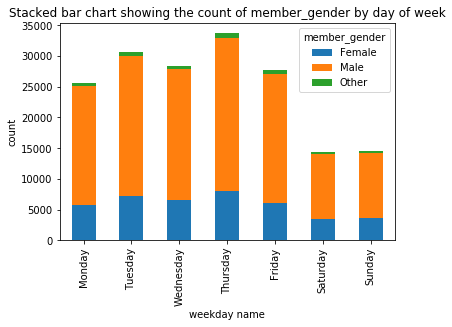

In [42]:
# On which day of the week do member_gender and user_type rent bikes?
grpweekday = df.groupby(['weekday_name', 'member_gender'])['member_gender'].count().unstack()
grpweekday.plot(kind='bar', stacked=True)
plt.xticks([0,1, 2, 3, 4,5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
add_chart_attr('Stacked bar chart showing the count of member_gender by day of week',x_axis='weekday name', y_axis='count');



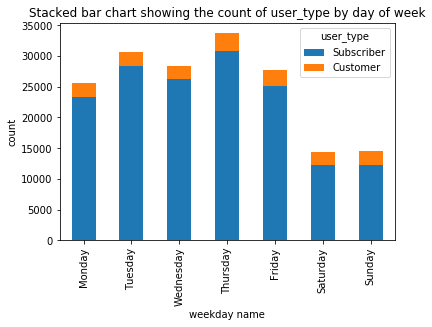

In [43]:
grpweekday = df.groupby(['weekday_name', 'user_type'])['member_gender'].count().unstack()
grpweekday.plot(kind='bar', stacked=True)
plt.xticks([0,1, 2, 3, 4,5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
add_chart_attr('Stacked bar chart showing the count of user_type by day of week',x_axis='weekday name', y_axis='count');


On each of the days (Monday-Sunday), although the number of subscribers varies greatly, the number of of customers seems to be consistent. When it comes to member gender, we see a similar consistency in the number of "other"  gender whereas the male and female genders are changing significantly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

> On average, 18 year olds spend the most time with the bike per individual, followed by 78 year olds. However, 30 and 31 year olds'  combined time spent with the bikes is the most at just above 2000 hours. In terms of the age group that frequents the bike rental, the 31 year olds are leading.

> On count and total time, the male gender rents bikes the most and uses the bikes the most (time), however, average time spent by a male person on the bikes is the least.
The 'other' gender is the opposite of males, with the least total duration (minutes) and count of renters, but they have the most average time spent on a bike by one person.

> On count and total time, the subscriber rents bikes the most and uses the bikes the most (time), however, average time spent by a subscriber on the bikes is the least.
The 'customer' is the opposite of subscribers, with the least total duration (minutes) and count of renters, but they have the most average time spent on a bike by one person.

> The bar chart and heatmap above indicate the male subsscriber as the one who rents the most, whereas the 'other' customer rents the least. 

> The male gender has a wider age range of bike renters whereas the femaile gender has a narrower range of renters. The number of user type renting bikes is larger on the younger subscribers.

> On each of the days (Monday-Sunday), although the number of subscribers varies greatly, the number of of customers seems to be consistent. When it comes to member gender, we see a similar consistency in the number of "other"  gender whereas the male and female genders are changing significantly.



## Multivariate Exploration


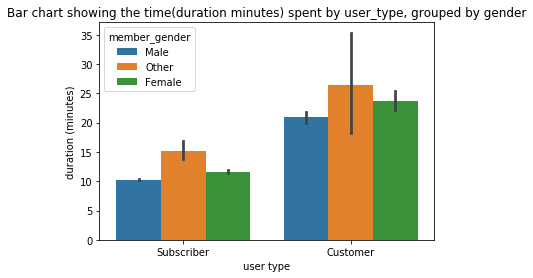

In [44]:
#convert user_type to categorical values and add to dataframe
user_classes = pd.api.types.CategoricalDtype(ordered=True, categories=df['user_type'].value_counts().keys())

# Use pandas.astype() to convert the  column from a plain object type into an ordered categorical type 
df['user_type'] = df['user_type'].astype(user_classes);
sns.barplot(data = df, x = 'user_type', y='duration_minutes', hue = 'member_gender');
add_chart_attr('Bar chart showing the time(duration minutes) spent by user_type, grouped by gender',x_axis='user type', y_axis='duration (minutes)');


In multivariate analysis, the bar chart above shows the duration in minutes, grouped by user type and member gender. The customers spend more time with bikes, and the 'other' gender customer spends the most time with the bikes. Similarly, the 'other' gender subscriber spends the most time with bike than the male and female counterparts. 

Let's explore the gender and day of week on the duration.

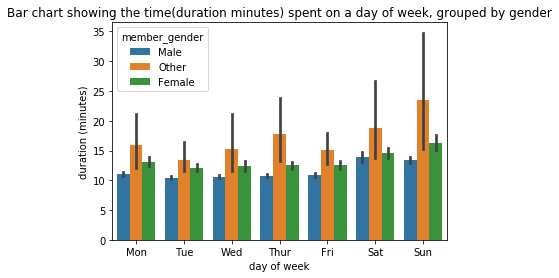

In [45]:
sns.barplot(data = df, x = 'weekday_name', y='duration_minutes', hue = 'member_gender');
plt.xticks([0,1, 2, 3, 4,5, 6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);
add_chart_attr('Bar chart showing the time(duration minutes) spent on a day of week, grouped by gender',x_axis='day of week', y_axis='duration (minutes)');


The 'other' gender consistently uses bikes for longer than the other genders across days of the week.

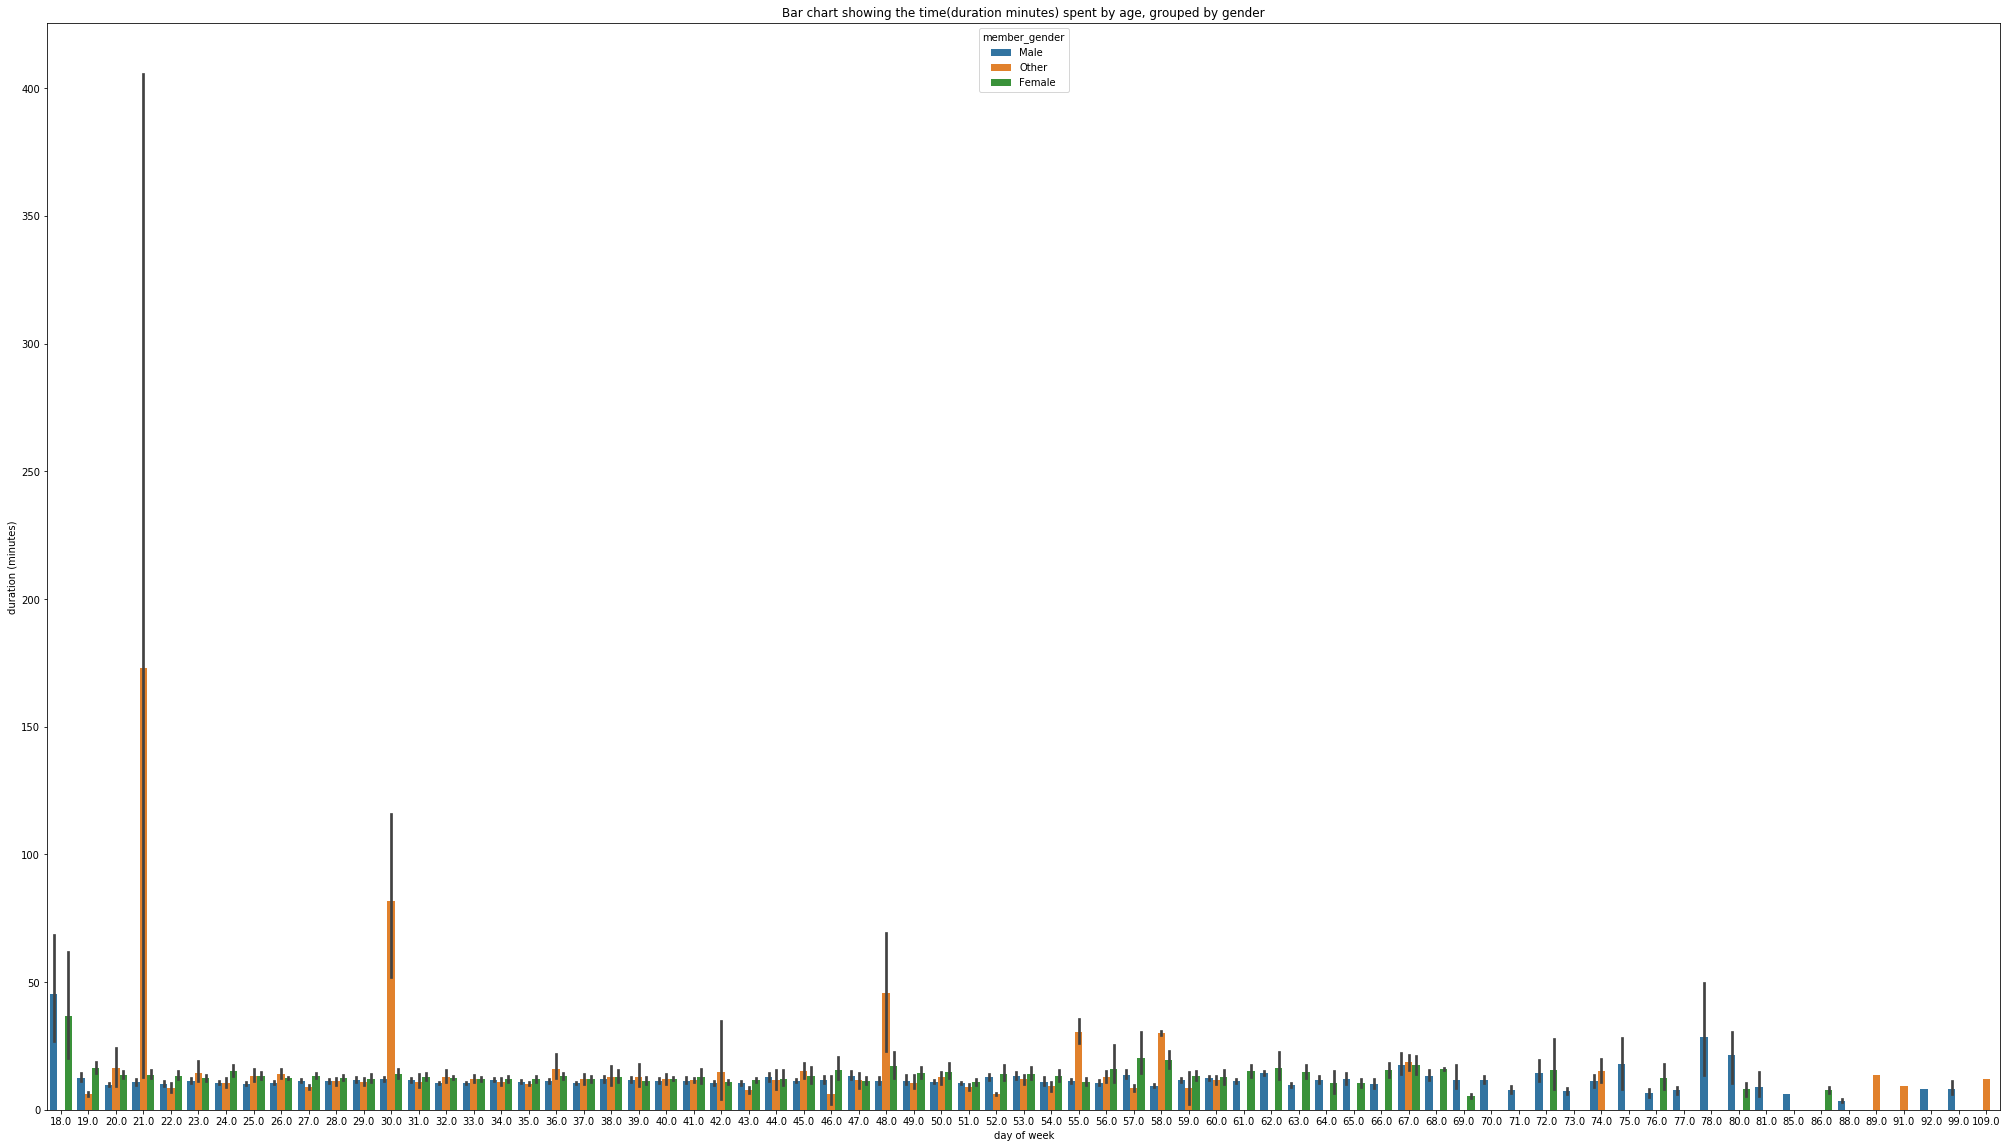

In [46]:
#convert user_type to categorical values and add to dataframe
user_classes = pd.api.types.CategoricalDtype(ordered=True, categories=df['user_type'].value_counts().keys())

# Use pandas.astype() to convert the  column from a plain object type into an ordered categorical type 
df['user_type'] = df['user_type'].astype(user_classes);
plt.figure(figsize=(35,20))

sns.barplot(data = df, x = 'age', y='duration_minutes', hue = 'member_gender');
# plt.xticks([0,1, 2, 3, 4,5, 6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);
add_chart_attr('Bar chart showing the time(duration minutes) spent by age, grouped by gender',x_axis='day of week', y_axis='duration (minutes)');


On age analysis, we see the age of 18 only having male and female and fewer or no 'other'. The age of 21, 30, and 42 have higher 'other' with a high duration(minutes). Over the age of 60, there are fewer 'other' gender with duration spent on bikes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In multivariate analysis, the bar chart above shows the duration in minutes, grouped by user type and member gender. The customers spend more time with bikes, and the 'other' gender customer spends the most time with the bikes. Similarly, the 'other' gender subscriber spends the most time with bike than the male and female counterparts. The 'other' gender consistently uses bikes for longer than the other genders across days of the week. On age analysis, we see the age of 18 only having male and female and fewer or no 'other'. The age of 21, 30, and 42 have higher 'other' with a high duration(minutes). Over the age of 60, there are fewer 'other' gender with duration spent on bikes.



### Were there any interesting or surprising interactions between features?

> The interesting interation is that on a daily basis the 'other' gender spends more duration(minutes) but this behaviour varies accross the ages.

## Conclusions

The dataset has a lot of categorical data and only 1 column of continuous data which is the duration_seconds. This made it hard to study correlations through scatter plots but provided me with an opportunity to deep dive into categorical data analysis. I derived age from member_birth_year for ease of interpretation and also converted duration_seconds to duration_minutes and duration_hours, also for ease of interpretation.

The main findings I made on this data are in relation to the effect users and user characteristics on duration. There are more rentals that spend less than an hour although very few rentals get to spend 23 hours with the bike. Thusday has a higher count of rentals whereas Saturday and Sunday have the lower count of rentals. Howerver, The average time spent on rentals by weekday indicate that Saturday and Sunday are the days where people spend more time with the bikes, with the average time of about 16 minutes.

There is a higher count of male bike renters, although on average they use the bike for less duration. The 'other' gender spends more duration on the bikes on a daily basis. 

There are more subscriber users than there are customer users, and interestingly the subscribers use less duration on the bike than customers.
